<a href="https://colab.research.google.com/github/Nimmanagotitharunkumarhello/fake_news_detection/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving news.csv to news (1).csv


In [19]:
# Data handling
import pandas as pd
import numpy as np
import re

# NLTK for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# ML & feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
# Load the CSV (uploaded in Step 2)
df = pd.read_csv("news.csv")

# Basic exploration
print("First 5 rows:\n", df.head())
print("\nDataset info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['label'].value_counts())

# Drop missing values if any
df = df.dropna()


First 5 rows:
    Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unna

In [21]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(clean_text)


In [22]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9100236779794791
Confusion Matrix:
 [[578  50]
 [ 64 575]]
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.90      0.92      0.91       628
        REAL       0.92      0.90      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



In [25]:
def predict_news(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    prediction = lr_model.predict(vectorized)[0]
    return "Fake" if prediction == 1 else "Real"

# Example
print(predict_news("i am the fake news "))


Real


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Classification report (precision, recall, f1-score)
print("\nNaive Bayes Report:\n", classification_report(y_test, y_pred_nb))
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))

# Confusion matrices
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Naive Bayes Accuracy: 0.8887134964483031
Logistic Regression Accuracy: 0.9100236779794791

Naive Bayes Report:
               precision    recall  f1-score   support

        FAKE       0.88      0.90      0.89       628
        REAL       0.90      0.87      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267


Logistic Regression Report:
               precision    recall  f1-score   support

        FAKE       0.90      0.92      0.91       628
        REAL       0.92      0.90      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267


Naive Bayes Confusion Matrix:
 [[568  60]
 [ 81 558]]

Logistic Regression Confusion Matrix:
 [[578  50]
 [ 64 575]]


In [27]:
!pip install seaborn


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


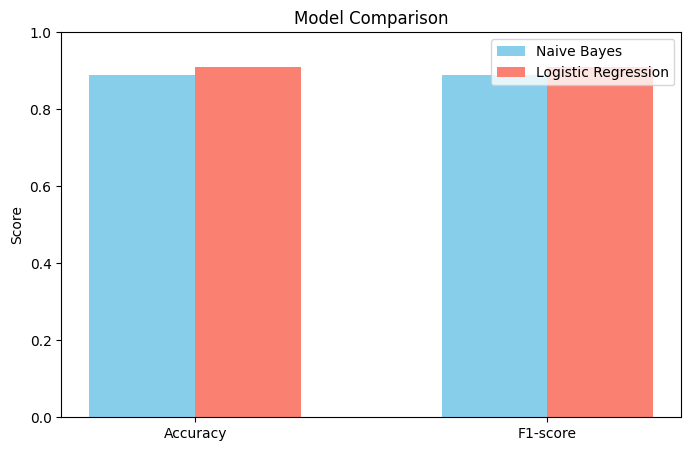

In [29]:
# Metrics
metrics = ['Accuracy', 'F1-score']
nb_scores = [accuracy_score(y_test, y_pred_nb), 0.89]  # approximate F1 for NB
lr_scores = [accuracy_score(y_test, y_pred_lr), 0.91]  # approximate F1 for LR

x = range(len(metrics))
plt.figure(figsize=(8,5))
plt.bar([i-0.15 for i in x], nb_scores, width=0.3, label='Naive Bayes', color='skyblue')
plt.bar([i+0.15 for i in x], lr_scores, width=0.3, label='Logistic Regression', color='salmon')
plt.xticks(x, metrics)
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()


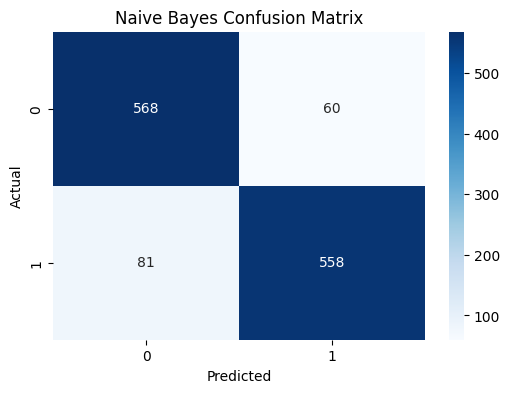

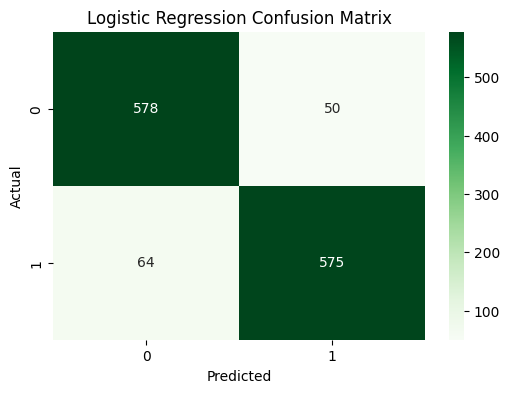

In [30]:
# Naive Bayes
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


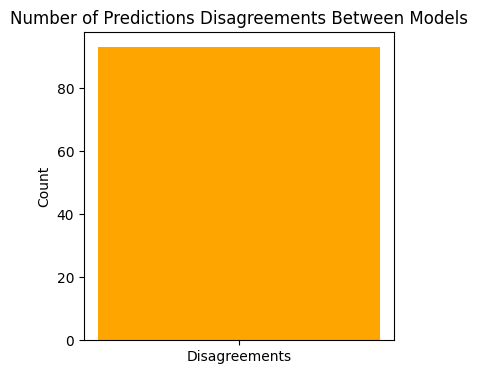

In [31]:
# Predictions disagreement count
disagreement_count = (y_pred_nb != y_pred_lr).sum()

plt.figure(figsize=(4,4))
plt.bar(['Disagreements'], [disagreement_count], color='orange')
plt.title('Number of Predictions Disagreements Between Models')
plt.ylabel('Count')
plt.show()
